<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/LAB02_Pr1_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Aprender a utilizar la librería mlxtend, frequent_patterns y el algoritmo Apriori. 

Sacar reglas de asociación a partir del dataset dato que relacionen los productos, categorías, edad del cliente y otras variables, teniendo en cuenta las configuraciones requeridas.

Estudiar las reglas que obtenemos que podrían ser significativas para una empresa de venta online a la hora de crear ofertas o mostrar los productos en función de los productos comprados y/o los datos del cliente.

In [4]:
# Importación de librerías a utilizar
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Lectura de la base de datos
filename = 'BlackFriday.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.dtypes)
data.head(10)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [6]:
# Rellenamos los valores na con 0, ya que no tiene categoría
data = data.fillna(0)

# Quitamos los duplicados
data = data.drop_duplicates()

In [7]:
df_Product = data.groupby(['User_ID','Product_ID'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [8]:
df_Gender = data.groupby(['User_ID','Gender'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [9]:
df_Age = data.groupby(['User_ID','Age'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [10]:
df_Occupation = data.groupby(['User_ID','Occupation'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Occupation = df_Occupation.set_axis(['0_O','1_O','2_O','3_O','4_O','5_O','6_O','7_O','8_O','9_O','10_O','11_O','12_O','13_O','14_O','15_O','16_O','17_O','18_O','19_O','20_O'], axis = 1, inplace = False)

In [11]:
df_City = data.groupby(['User_ID','City_Category'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [12]:
df_Stay = data.groupby(['User_ID','Stay_In_Current_City_Years'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Stay = df_Stay.set_axis(['0_S','1_S','2_S','3_S','4+_S'], axis = 1, inplace = False)

In [13]:
df_Marital = data.groupby(['User_ID','Marital_Status'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Marital = df_Marital.set_axis(['0_M','1_M'], axis = 1, inplace = False)

In [14]:
df_Product_Category_1 = data.groupby(['User_ID','Product_Category_1'])['Product_Category_2'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_1 = df_Product_Category_1.set_axis(['1_C1','2_C1','3_C1','4_C1','5_C1','6_C1','7_C1','8_C1','9_C1','10_C1','11_C1','12_C1','13_C1','14_C1','15_C1','16_C1','17_C1','18_C1'], axis = 1, inplace = False)

In [15]:
df_Product_Category_2 = data.groupby(['User_ID','Product_Category_2'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_2 = df_Product_Category_2.set_axis(['0_C2','2_C2','3_C2','4_C2','5_C2','6_C2','7_C2','8_C2','9_C2','10_C2','11_C2','12_C2','13_C2','14_C2','15_C2','16_C2','17_C2','18_C2'], axis = 1, inplace = False)

In [16]:
df_Product_Category_3 = data.groupby(['User_ID','Product_Category_3'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_3 = df_Product_Category_3.set_axis(['0_C3','3_C3','4_C3','5_C3','6_C3','8_C3','9_C3','10_C3','11_C3','12_C3','13_C3','14_C3','15_C3','16_C3','17_C3','18_C3'], axis = 1, inplace = False)

In [17]:
df = pd.concat([df_Product, df_Occupation, df_City, df_Stay, df_Marital, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)

In [18]:
frq_items = apriori(df, min_support = 0.5, use_colnames = True)

# Eliminamos las reglas que no sirven
mask = (frq_items['itemsets'].apply(lambda x: '0_C2' in x) | frq_items['itemsets'].apply(lambda x: '0_C3' in x))
frq_items = frq_items.drop(frq_items[mask].index)

In [19]:
# K = 1
print(frq_items[frq_items['itemsets'].apply(lambda x: len(x)) == 1])

     support itemsets
0   0.532847      (C)
1   0.580037    (0_M)
2   0.905958   (1_C1)
3   0.536581   (2_C1)
4   0.852996   (5_C1)
5   0.521643   (6_C1)
6   0.767951   (8_C1)
8   0.729588   (2_C2)
9   0.527075   (4_C2)
10  0.592938   (5_C2)
11  0.516890   (6_C2)
12  0.830929   (8_C2)
13  0.757936  (14_C2)
14  0.656765  (15_C2)
15  0.723986  (16_C2)
17  0.533865   (5_C3)
18  0.538618  (14_C3)
19  0.565099  (15_C3)
20  0.670175  (16_C3)
21  0.556782  (17_C3)
22  0.717196      (M)


In [20]:
# Para k >= 2, número de items por regla.
i = 2
while i <= max(frq_items['itemsets'].apply(lambda x: len(x))):
  print(frq_items[frq_items['itemsets'].apply(lambda x: len(x)) == i])
  i = i + 1

      support        itemsets
24   0.527245     (1_C1, 0_M)
27   0.516551    (1_C1, 2_C1)
28   0.781531    (1_C1, 5_C1)
29   0.711254    (1_C1, 8_C1)
31   0.729588    (1_C1, 2_C2)
..        ...             ...
118  0.544559  (15_C2, 16_C3)
119  0.505177      (15_C2, M)
121  0.553217  (16_C3, 16_C2)
122  0.539127      (16_C2, M)
129  0.503650      (16_C3, M)

[65 rows x 2 columns]
      support              itemsets
134  0.647938    (1_C1, 8_C1, 5_C1)
136  0.644543    (1_C1, 5_C1, 2_C2)
137  0.526057    (1_C1, 5_C2, 5_C1)
138  0.705653    (1_C1, 8_C2, 5_C1)
139  0.657274   (1_C1, 5_C1, 14_C2)
..        ...                   ...
309  0.524868   (8_C2, 16_C2, 2_C2)
311  0.518418   (8_C2, 16_C3, 2_C2)
320  0.538109  (8_C2, 16_C2, 14_C2)
322  0.518927  (8_C2, 16_C3, 14_C2)
325  0.511119  (8_C2, 16_C3, 16_C2)

[74 rows x 2 columns]
      support                    itemsets
343  0.548973    (1_C1, 8_C1, 5_C1, 2_C2)
344  0.601935    (1_C1, 8_C2, 8_C1, 5_C1)
345  0.578849   (1_C1, 8_C1, 5_C1, 1

In [21]:
# Reglas de asociación independientemente de la confianza
rules = association_rules(frq_items, metric = 'confidence', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_C1),(0_M),0.905958,0.580037,0.527245,0.581975,1.003340,0.001755,1.004635
1,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
2,(1_C1),(2_C1),0.905958,0.536581,0.516551,0.570171,1.062599,0.030430,1.078146
3,(2_C1),(1_C1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
4,(1_C1),(5_C1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
...,...,...,...,...,...,...,...,...,...
1265,(5_C1),"(1_C1, 8_C2, 16_C2, 14_C2)",0.852996,0.525378,0.503819,0.590647,1.124233,0.055674,1.159444
1266,(14_C2),"(1_C1, 8_C2, 16_C2, 5_C1)",0.757936,0.567306,0.503819,0.664726,1.171723,0.073838,1.290567
1267,(16_C2),"(1_C1, 8_C2, 5_C1, 14_C2)",0.723986,0.607707,0.503819,0.695897,1.145120,0.063848,1.290001
1268,(1_C1),"(8_C2, 16_C2, 5_C1, 14_C2)",0.905958,0.516551,0.503819,0.556118,1.076598,0.035846,1.089138


In [22]:
# Reglas de asociación de alta confianza (confianza >= 0.9)
rules_AltaConf = association_rules(frq_items, metric ="confidence", min_threshold = 0.9)
rules_AltaConf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
1,(2_C1),(1_C1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
2,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
3,(8_C1),(1_C1),0.767951,0.905958,0.711254,0.926172,1.022312,0.015523,1.273787
4,(2_C2),(1_C1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
...,...,...,...,...,...,...,...,...,...
251,"(1_C1, 16_C2, 5_C1, 14_C2)",(8_C2),0.533186,0.830929,0.503819,0.944922,1.137188,0.060780,3.069673
252,"(8_C2, 16_C2, 5_C1, 14_C2)",(1_C1),0.516551,0.905958,0.503819,0.975353,1.076598,0.035846,3.815588
253,"(1_C1, 8_C2, 16_C2, 14_C2)",(5_C1),0.525378,0.852996,0.503819,0.958966,1.124233,0.055674,3.582497
254,"(16_C2, 5_C1, 14_C2)","(1_C1, 8_C2)",0.551519,0.773892,0.503819,0.913512,1.180412,0.077003,2.614319


In [23]:
# Dado un antecesor, devolver todas las reglas que contengan dicho antecesor
# Por ejemplo, vamos a ver las reglas donde el antecedente contiene la característica
# de que el usuario está casado

rules[rules['antecedents'].apply(lambda x: '0_M' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.00334,0.001755,1.03325


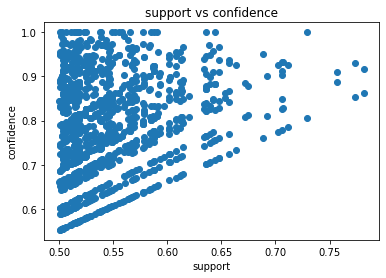

In [24]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

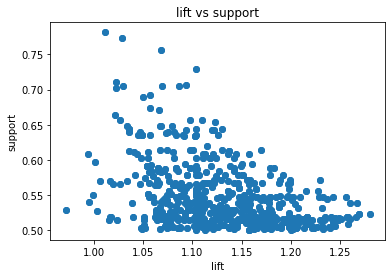

In [25]:
plt.scatter(rules['lift'],rules['support'])
plt.xlabel('lift')
plt.ylabel('support')
plt.title('lift vs support')
plt.show()

# Preguntas
Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [26]:
df = pd.concat([df_Age, df_Gender, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3], axis = 1)
frq_items_all = apriori(df, min_support = 0.3, use_colnames = True)

# Eliminamos los soportes que no sirven
mask = (frq_items_all['itemsets'].apply(lambda x: '0_C2' in x) | frq_items_all['itemsets'].apply(lambda x: '0_C3' in x))
frq_items_all = frq_items_all.drop(frq_items_all[mask].index)

In [27]:
frq_items_all_30 = frq_items_all[frq_items_all["support"].apply(lambda x: 0.30 <= x)]
frq_items_all_50 = frq_items_all[frq_items_all["support"].apply(lambda x: 0.50 <= x)]
frq_items_all_70 = frq_items_all[frq_items_all["support"].apply(lambda x: 0.70 <= x)]

¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

Da lo mismo.

 ¿Qué   tipo   reglas   desaparecen   según   la   configuración   y   categorías   ( género,   edad   y   tipo   de   producto)
consideradas? ¿Por qué?

In [28]:
rules_30 = association_rules(frq_items_all_30, metric = 'confidence', min_threshold=0.6)
rules_30

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(26-35),(1_C1),0.348498,0.905958,0.326600,0.937165,1.034446,0.010876,1.496649
1,(26-35),(5_C1),0.348498,0.852996,0.301307,0.864588,1.013590,0.004040,1.085608
2,(26-35),(8_C2),0.348498,0.830929,0.301477,0.865075,1.041095,0.011900,1.253082
3,(1_C1),(M),0.905958,0.717196,0.663724,0.732621,1.021508,0.013975,1.057692
4,(M),(1_C1),0.717196,0.905958,0.663724,0.925444,1.021508,0.013975,1.261354
...,...,...,...,...,...,...,...,...,...
377362,"(15_C3, 14_C2)","(15_C2, 16_C3, 16_C2, 8_C1, 1_C1, 8_C2, 2_C2)",0.464777,0.375828,0.304023,0.654127,1.740498,0.129347,1.804630
377363,"(16_C3, 15_C3)","(15_C2, 14_C2, 16_C2, 8_C1, 1_C1, 8_C2, 2_C2)",0.466474,0.370056,0.304023,0.651747,1.761211,0.131401,1.808867
377364,"(16_C2, 15_C3)","(15_C2, 14_C2, 16_C3, 8_C1, 1_C1, 8_C2, 2_C2)",0.467832,0.372093,0.304023,0.649855,1.746485,0.129946,1.793276
377365,"(8_C1, 15_C3)","(15_C2, 14_C2, 16_C3, 16_C2, 1_C1, 8_C2, 2_C2)",0.474453,0.367680,0.304023,0.640787,1.742787,0.129577,1.760295


In [29]:
rules_50 = association_rules(frq_items_all_50, metric = 'confidence', min_threshold=0.6)
rules_50

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_C1),(M),0.905958,0.717196,0.663724,0.732621,1.021508,0.013975,1.057692
1,(M),(1_C1),0.717196,0.905958,0.663724,0.925444,1.021508,0.013975,1.261354
2,(M),(5_C1),0.717196,0.852996,0.608216,0.848047,0.994198,-0.003549,0.967432
3,(5_C1),(M),0.852996,0.717196,0.608216,0.713035,0.994198,-0.003549,0.985500
4,(8_C1),(M),0.767951,0.717196,0.550331,0.716622,0.999201,-0.000440,0.997977
...,...,...,...,...,...,...,...,...,...
1203,"(8_C2, 16_C2)","(1_C1, 5_C1, 14_C2)",0.635715,0.657274,0.503819,0.792523,1.205774,0.085980,1.651878
1204,"(1_C1, 8_C2)","(16_C2, 5_C1, 14_C2)",0.773892,0.551519,0.503819,0.651020,1.180412,0.077003,1.285119
1205,(14_C2),"(1_C1, 8_C2, 16_C2, 5_C1)",0.757936,0.567306,0.503819,0.664726,1.171723,0.073838,1.290567
1206,(16_C2),"(1_C1, 8_C2, 5_C1, 14_C2)",0.723986,0.607707,0.503819,0.695897,1.145120,0.063848,1.290001


In [30]:
rules_70 = association_rules(frq_items_all_70, metric = 'confidence', min_threshold=0.6)
rules_70

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_C1),(5_C1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
1,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
2,(1_C1),(8_C1),0.905958,0.767951,0.711254,0.785085,1.022312,0.015523,1.079725
3,(8_C1),(1_C1),0.767951,0.905958,0.711254,0.926172,1.022312,0.015523,1.273787
4,(1_C1),(2_C2),0.905958,0.729588,0.729588,0.805321,1.103804,0.068612,1.389020
5,(2_C2),(1_C1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
6,(1_C1),(8_C2),0.905958,0.830929,0.773892,0.854225,1.028037,0.021106,1.159813
7,(8_C2),(1_C1),0.830929,0.905958,0.773892,0.931359,1.028037,0.021106,1.370043
8,(1_C1),(14_C2),0.905958,0.757936,0.701918,0.774780,1.022224,0.015260,1.074789
9,(14_C2),(1_C1),0.757936,0.905958,0.701918,0.926092,1.022224,0.015260,1.272413


Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold. Justifica los resultados.

In [31]:
rules_50_lift = association_rules(frq_items_all_50, metric = 'lift', min_threshold=1.2)
rules_50_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(15_C3),(2_C2),0.565099,0.729588,0.523171,0.925804,1.268941,0.110882,3.644547
1,(2_C2),(15_C3),0.729588,0.565099,0.523171,0.717078,1.268941,0.110882,1.537174
2,(15_C2),(16_C3),0.656765,0.670175,0.544559,0.829155,1.237222,0.104412,1.930550
3,(16_C3),(15_C2),0.670175,0.656765,0.544559,0.812563,1.237222,0.104412,1.831207
4,"(1_C1, 5_C2)",(2_C2),0.571550,0.729588,0.500594,0.875854,1.200478,0.083599,2.178179
...,...,...,...,...,...,...,...,...,...
143,"(16_C2, 5_C1)","(1_C1, 8_C2, 14_C2)",0.639620,0.635715,0.503819,0.787686,1.239054,0.097203,1.715780
144,"(16_C2, 14_C2)","(1_C1, 8_C2, 5_C1)",0.584281,0.705653,0.503819,0.862289,1.221974,0.091520,2.137433
145,"(1_C1, 14_C2)","(8_C2, 16_C2, 5_C1)",0.701918,0.587167,0.503819,0.717775,1.222438,0.091676,1.462781
146,"(8_C2, 14_C2)","(1_C1, 16_C2, 5_C1)",0.671533,0.611441,0.503819,0.750253,1.227024,0.093217,1.555808


In [32]:
rules_50_support = association_rules(frq_items_all_50, metric = 'support', min_threshold=0.7)
rules_50_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_C1),(5_C1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
1,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
2,(1_C1),(8_C1),0.905958,0.767951,0.711254,0.785085,1.022312,0.015523,1.079725
3,(8_C1),(1_C1),0.767951,0.905958,0.711254,0.926172,1.022312,0.015523,1.273787
4,(1_C1),(2_C2),0.905958,0.729588,0.729588,0.805321,1.103804,0.068612,1.389020
5,(2_C2),(1_C1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
6,(1_C1),(8_C2),0.905958,0.830929,0.773892,0.854225,1.028037,0.021106,1.159813
7,(8_C2),(1_C1),0.830929,0.905958,0.773892,0.931359,1.028037,0.021106,1.370043
8,(1_C1),(14_C2),0.905958,0.757936,0.701918,0.774780,1.022224,0.015260,1.074789
9,(14_C2),(1_C1),0.757936,0.905958,0.701918,0.926092,1.022224,0.015260,1.272413


###Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos.

Hemos decidido aislar algunas reglas para estudiarlas por conveniencia.

Las primeras tienen que ver con la edad, tras probar todos los posibles rangos de edad, con el soporte mínimo que hemos considerado (0.3), observamos que solo nos devuelve alguna regla el de '26-35' años.

Es por ello que llegamos a la conclusión de que con el set de datos dado la edad no es una buena variable para sacar reglas de asociación, pues el modelo creado tiene en cuenta un soporte mínimo de 0.3 y una confianza de 0.6, a pesar de tener en cuenta una buena cantidad de reglas, tan solo nos devuelve 3 reglas. Y, por otro lado, que el rango de edad del que más datos hay es el de '26-35' años.

Con toda la información conocida, concluimos que el soporte de los rangos de las edades es menor o igual a 0.348498 para todos los rangos.

Aunque la confianza es notablemente mayor en la primera regla que en las otras dos, es mejor la tercera reglas, puesto que el lift es más alto en esta última y es en lo que nos debemos fijar. 

In [33]:
rules_30[rules_30['antecedents'].apply(lambda x: '26-35' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(26-35),(1_C1),0.348498,0.905958,0.326600,0.937165,1.034446,0.010876,1.496649
1,(26-35),(5_C1),0.348498,0.852996,0.301307,0.864588,1.013590,0.004040,1.085608
2,(26-35),(8_C2),0.348498,0.830929,0.301477,0.865075,1.041095,0.011900,1.253082


En el caso del género, vemos que con un soporte mínimo de 0.5 y una confianza de 0.6, no tenemos ninguna regla con mujeres. De hecho, vemos en el soporte que más del 70% de los datos son de clientes de género masculino ('M').

Aún habiendo restringido el número de reglas al aumentar el soporte mínimo en un 0.2 respecto al caso anterior, obtenemos más reglas y además llega a itemsets de mayor tamaño. Con esto deducimos que tiene mucha más importancia el género que la edad a la hora de definir reglas de asociación.

Las reglas que tenemos son casi todas buenas, excepto 4 de ellas, cuyo lift es menor que 1.

In [34]:
rules_50[rules_50['antecedents'].apply(lambda x: 'M' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(M),(1_C1),0.717196,0.905958,0.663724,0.925444,1.021508,0.013975,1.261354
2,(M),(5_C1),0.717196,0.852996,0.608216,0.848047,0.994198,-0.003549,0.967432
5,(M),(8_C1),0.717196,0.767951,0.550331,0.767337,0.999201,-0.000440,0.997362
6,(M),(2_C2),0.717196,0.729588,0.551859,0.769467,1.054661,0.028602,1.172991
9,(M),(8_C2),0.717196,0.830929,0.596673,0.831953,1.001233,0.000734,1.006094
10,(M),(14_C2),0.717196,0.757936,0.527924,0.736095,0.971183,-0.015664,0.917239
13,(M),(15_C2),0.717196,0.656765,0.505177,0.704379,1.072498,0.034149,1.161065
15,(M),(16_C2),0.717196,0.723986,0.539127,0.751716,1.038302,0.019888,1.111688
17,(M),(16_C3),0.717196,0.670175,0.503650,0.702249,1.047859,0.023003,1.107720
119,"(1_C1, M)",(5_C1),0.663724,0.852996,0.569683,0.858312,1.006232,0.003528,1.037519


El último estudio es sobre la categoría 1 de la categoría principal de un produto, denominado '1_C1'.

Aumentando el soporte mínimo un 0.2 más respecto al caso anterior, es decir, un 0.7, conseguimos un buen número de reglas; lo consideramos así ya que la restricción es mucho mayor que anteriormente.

Cabe destacar que solo muestra asosiación entre categorías de los productos, tanto la principal como las dos secundarias que categorizan los productos.

Algunas de las reglas asocian dos categorías principales, lo cual quiere decir varios clientes compraron dos productos cuyas categorías principales son, poniendo como ejemplo la primera regla, '1_C1' y '5_C1'.

Todas las reglas obtenidas son buenas, ya que el lift de todas ellas es mayor que 1.

Hemos estudiado también que la mayoría de las reglas contienen como item por lo menos una categoría de producto.

In [35]:
rules_70[rules_70['antecedents'].apply(lambda x: '1_C1' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_C1),(5_C1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
2,(1_C1),(8_C1),0.905958,0.767951,0.711254,0.785085,1.022312,0.015523,1.079725
4,(1_C1),(2_C2),0.905958,0.729588,0.729588,0.805321,1.103804,0.068612,1.389020
6,(1_C1),(8_C2),0.905958,0.830929,0.773892,0.854225,1.028037,0.021106,1.159813
8,(1_C1),(14_C2),0.905958,0.757936,0.701918,0.774780,1.022224,0.015260,1.074789
14,"(1_C1, 8_C2)",(5_C1),0.773892,0.852996,0.705653,0.911823,1.068965,0.045526,1.667141
15,"(1_C1, 5_C1)",(8_C2),0.781531,0.830929,0.705653,0.902911,1.086628,0.056256,1.741398
17,(1_C1),"(8_C2, 5_C1)",0.905958,0.756748,0.705653,0.778902,1.029276,0.020071,1.100202
